In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import pymysql
%matplotlib inline

#importing preliminary libraries

In [2]:
import getpass 
password = getpass.getpass()
#Input password, but keeping it hidden!

········


In [3]:
engine = create_engine('mysql+pymysql://root:' + password + '@localhost/credit_card_classification') #connect to MySQl Workbench
data = pd.read_sql_query('SELECT * FROM credit_card_classification.credit_card_data', engine) #Query to import the data
data.head()

,Customer_Number,Offer_Accepted,Reward_Type,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1,Q2,Q3
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0


In [4]:
data.info() #Checking for NaNs and making sure dtypes are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       17976 non-null  int64  
 1   Offer_Accepted        17976 non-null  object 
 2   Reward_Type           17976 non-null  object 
 3   Mailer_Type           17976 non-null  object 
 4   Income_Level          17976 non-null  object 
 5   Bank_Accounts_Open    17976 non-null  int64  
 6   Overdraft_Protection  17976 non-null  object 
 7   Credit_Rating         17976 non-null  object 
 8   Credit_Cards_Held     17976 non-null  int64  
 9   Homes_Owned           17976 non-null  int64  
 10  Household_Size        17976 non-null  int64  
 11  Own_Your_Home         17976 non-null  object 
 12  Average_Balance       17976 non-null  float64
 13  Q1                    17976 non-null  float64
 14  Q2                    17976 non-null  float64
 15  Q3                 

In [5]:
df = data.copy() #Copying, just in case :)

In [51]:
df["Customer_Number"].duplicated( )

KeyError: 'Customer_Number'

In [6]:
df = df.set_index("Customer_Number")
df.head()
#The Customer_Number is valuable info however detrimental to the model, 
#So making it an index to conserve it whilst simultaneously getting it to not affect calculations 

,Offer_Accepted,Reward_Type,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1,Q2,Q3
Customer_Number,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0


<h1> Exploration<h/1>

In [7]:
df_cat = df.select_dtypes("object") # Selecting Categorical Data
df_cat.head()

,Offer_Accepted,Reward_Type,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home
Customer_Number,,,,,,,
1,No,Air Miles,Letter,High,No,High,No
2,No,Air Miles,Letter,Medium,No,Medium,Yes
3,No,Air Miles,Postcard,High,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No
5,No,Air Miles,Letter,Medium,No,Medium,Yes


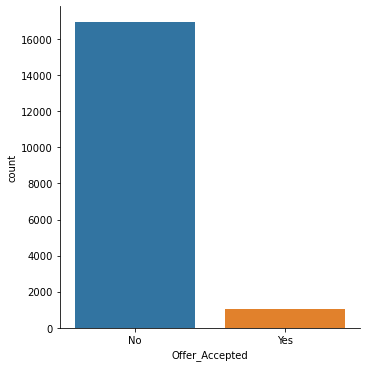

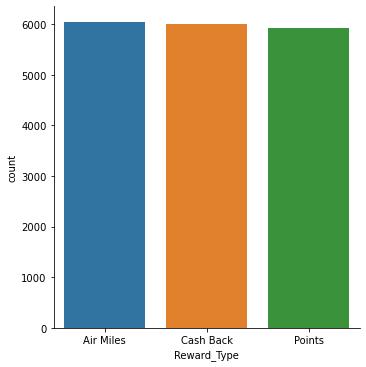

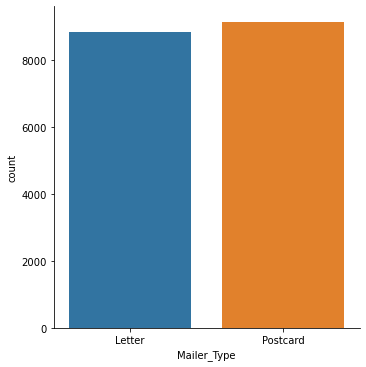

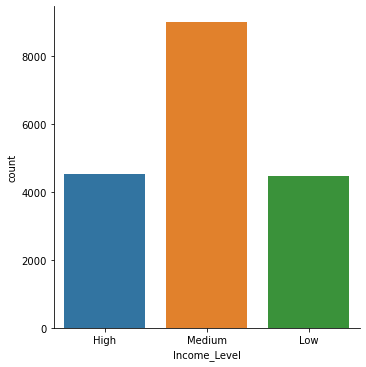

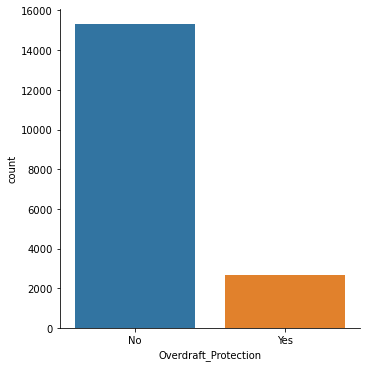

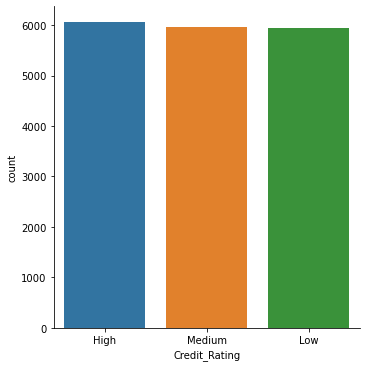

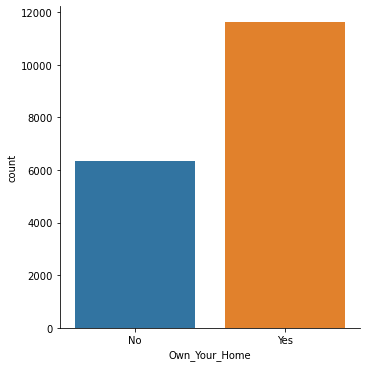

In [8]:
for col in df_cat.columns: #Displaying Categorical Data
    sns.catplot(x = col, kind = "count", data = df_cat)
    plt.show()

In [9]:
df_cat = df_cat.drop("Offer_Accepted", axis = 1) # Dropping what we want to predict

In [10]:
df_num = df.select_dtypes("number") # Selecting Numerical Data
df_num.head()

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1,Q2,Q3
Customer_Number,,,,,,,,
1,1,2,1,4,1160.75,1669.0,877.0,1095.0
2,1,2,2,5,147.25,39.0,106.0,78.0
3,2,2,1,2,276.50,367.0,352.0,145.0
4,2,1,1,4,1219.00,1578.0,1760.0,1119.0
5,1,2,1,6,1211.00,2140.0,1357.0,982.0


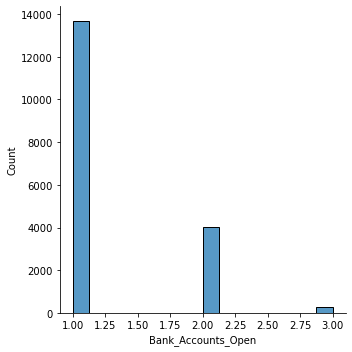

Skewness:  1.5774006502627758


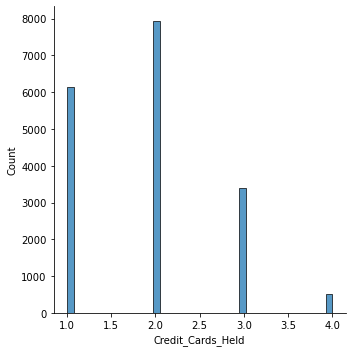

Skewness:  0.5140513822808801


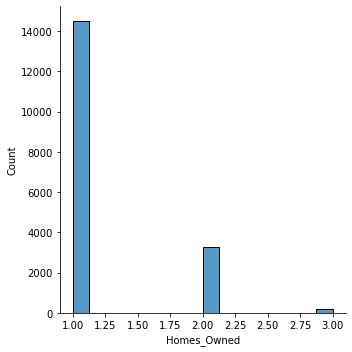

Skewness:  1.860769745992946


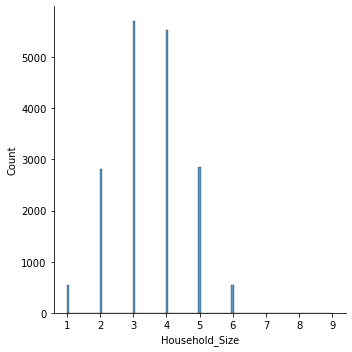

Skewness:  0.016946629549552998


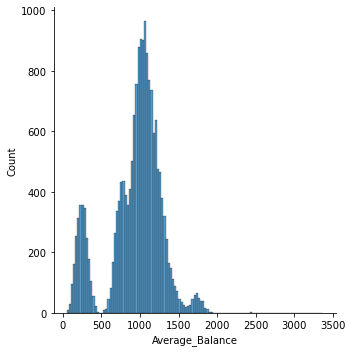

Skewness:  -0.5723407970872233


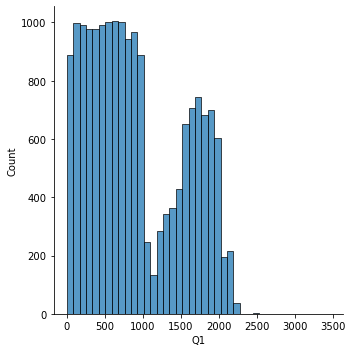

Skewness:  0.4109111821855019


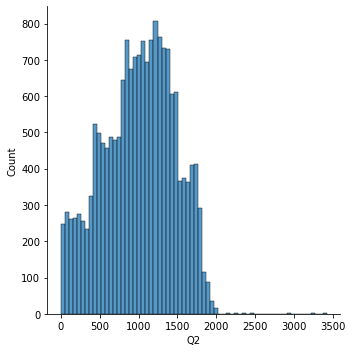

Skewness:  -0.18299270673139534


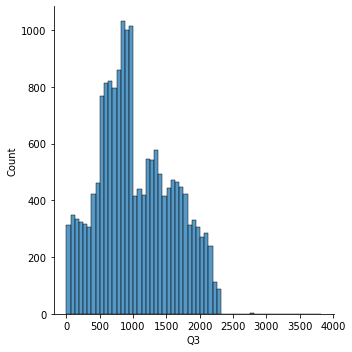

Skewness:  0.28962875846919944


In [11]:
for col in df_num.columns: # Displaying Numerical Columns
    sns.displot(df_num[col])
    Skewnes = df_num[col].skew()
    plt.show()
    print("Skewness: ", Skewnes )

<h1> Correlation <h/1>

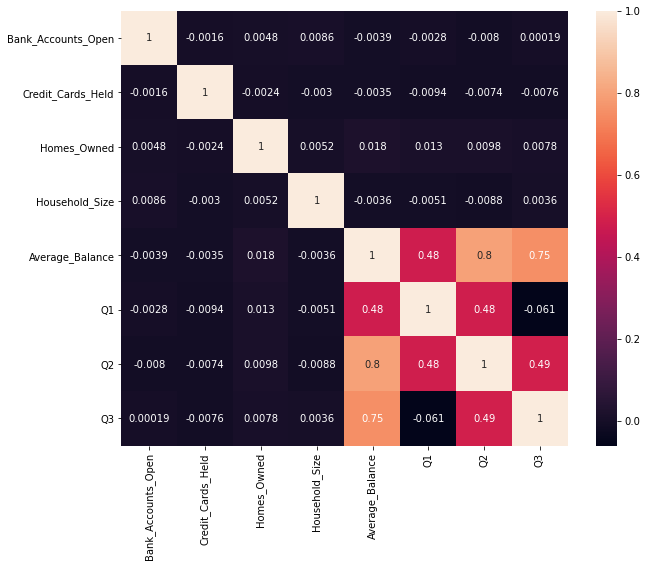

In [12]:
corr_matrix=df_num.corr(method='pearson')  #Checking for Correlation using a heat map
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
df_num = df_num.drop(["Q1","Q2","Q3"], axis = 1) 
#Due to the high multicolierality, removed Q1,2 and 3 as Average balance contains the info they provide

<h1> Outliers <h/1>

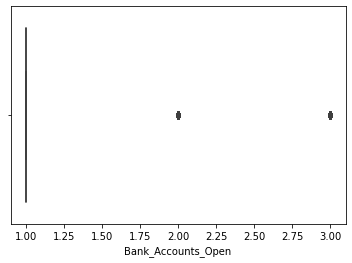

1st Quartile:  1.0  3rd Quartile:  1.0


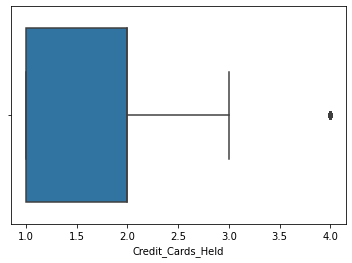

1st Quartile:  1.0  3rd Quartile:  2.0


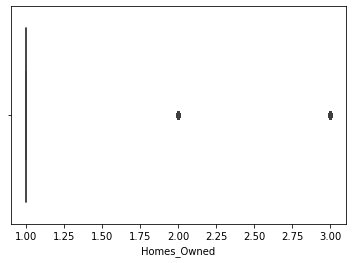

1st Quartile:  1.0  3rd Quartile:  1.0


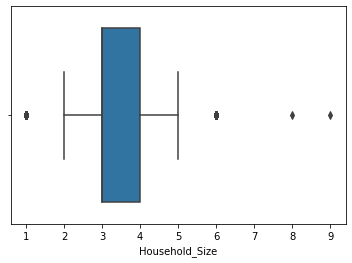

1st Quartile:  3.0  3rd Quartile:  4.0


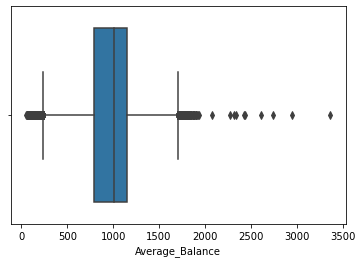

1st Quartile:  787.5  3rd Quartile:  1153.25


In [14]:
for col in df_num: # Visualizing Outliers
    sns.boxplot(x = df_num[col])
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    plt.show()
    print("1st Quartile: ", Q1, " 3rd Quartile: ", Q3)


In [15]:
#Q1 = df_num["Average_Balance"].quantile(0.25)
#Q3 = df_num["Average_Balance"].quantile(0.75)
#IQR  = Q3-Q1
#df_num["Average_Balance"]  =  df_num.loc[("Customer Lifetime Value" < (IQR + 1.5*Q3)) & ("Customer Lifetime Value" > (IQR - 1.5*Q1))]

<h1> Logistic Regression Models General Setup<h/1>

In [16]:
df_cat_dum = pd.get_dummies(df_cat, drop_first = True) # Dummifying Categoricals so the model can interpret them
df_cat_dum.shape

(17976, 9)

In [17]:
X = pd.concat([df_cat_dum, df_num], axis = 1) #Joining the Numerical and dumified categorical data
y = df["Offer_Accepted"]
X.head()

,Reward_Type_Cash Back,Reward_Type_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Overdraft_Protection_Yes,Credit_Rating_Low,Credit_Rating_Medium,Own_Your_Home_Yes,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance
Customer_Number,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,2,1,4,1160.75
2,0,0,0,0,1,0,0,1,1,1,2,2,5,147.25
3,0,0,1,0,0,0,0,1,1,2,2,1,2,276.50
4,0,0,0,0,1,0,0,0,0,2,1,1,4,1219.00
5,0,0,0,0,1,0,0,1,1,1,2,1,6,1211.00


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Imported Logistic Regression Model and a Library to Train and Test it

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Importing methods to visualize validity and accuracy of results

In [19]:
def Log_Analisis(classification, X_test, y_test): #Function that tests the prediction of Logistic models with a variety of parameters
    predictions = classification.predict(X_test) 
    print("The accuracy of the model: %4.2f " % accuracy_score(y_test, predictions))
    print("The Kappa of the model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
    print()
    print(classification_report(y_test, predictions, labels=["Yes","No"], zero_division = 1))
    plot_confusion_matrix(classification, X_test, y_test) 
    plt.show() 

<h1> Logistic Regression (Unedited) <h/1>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#Splitting data for Model

classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())
#Training the model; using a high 'max_iter' for conversion, 

The accuracy of the model: 0.94 
The Kappa of the model is: 0.00

              precision    recall  f1-score   support

         Yes       1.00      0.00      0.00       204
          No       0.94      1.00      0.97      3392

    accuracy                           0.94      3596
   macro avg       0.97      0.50      0.49      3596
weighted avg       0.95      0.94      0.92      3596



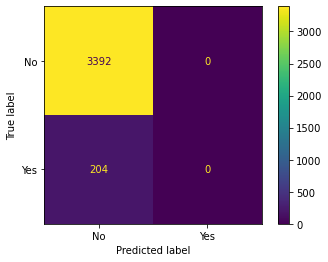

In [21]:
Log_Analisis(classification, X_test, y_test) #Test said Prediction

<h1> Logistic Regression (Balanced - Smote) <h/1>

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)
y_sm = y_sm.to_numpy()
y_sm = pd.DataFrame(data=y_sm.flatten())
y_sm.value_counts()

Yes    16955
No     16955
dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=58)
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())

The accuracy of the model: 0.81 
The Kappa of the model is: 0.63

              precision    recall  f1-score   support

         Yes       0.81      0.82      0.82      3413
          No       0.82      0.80      0.81      3369

    accuracy                           0.81      6782
   macro avg       0.81      0.81      0.81      6782
weighted avg       0.81      0.81      0.81      6782



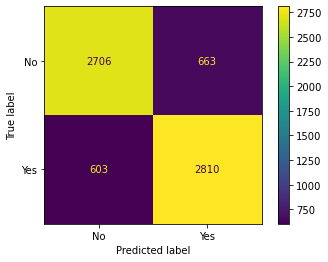

In [24]:
Log_Analisis(classification, X_test, y_test) #Test said Prediction

<h1> Logistic Regression (Balanced - TomeLinks) <h/1>

In [25]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

X_tl, y_tl = tl.fit_sample(X, y)
y_tl = y_tl.to_numpy()
y_tl = pd.DataFrame(data=y_tl.flatten())
y_tl.value_counts()

No     16521
Yes     1021
dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=58)
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())

The accuracy of the model: 0.94 
The Kappa of the model is: 0.00

              precision    recall  f1-score   support

         Yes       1.00      0.00      0.00       215
          No       0.94      1.00      0.97      3294

    accuracy                           0.94      3509
   macro avg       0.97      0.50      0.48      3509
weighted avg       0.94      0.94      0.91      3509



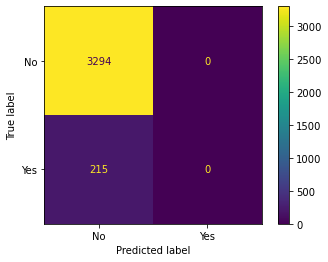

In [27]:
Log_Analisis(classification, X_test, y_test) #Test said Prediction

<h1> Logistic Regression (Balanced - Resample) <h/1>

In [28]:
from sklearn.utils import resample

#downsample majority
X_res, y_res = resample(X[y == "No"],y[y == "No"],
                                replace=False, # sample without replacemente
                                n_samples=len(X[y == "Yes"]), # match minority 
                                random_state=0) #reproducible results

# combine minority and downsampled majority
X_res = pd.concat([X_res, X[y == "Yes"]])
y_res = pd.concat([y_res, y[y == "Yes"]])

y_res.value_counts()

No     1021
Yes    1021
Name: Offer_Accepted, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=58)

classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train)

The accuracy of the model: 0.68 
The Kappa of the model is: 0.36

              precision    recall  f1-score   support

         Yes       0.67      0.67      0.67       196
          No       0.70      0.69      0.69       213

    accuracy                           0.68       409
   macro avg       0.68      0.68      0.68       409
weighted avg       0.68      0.68      0.68       409



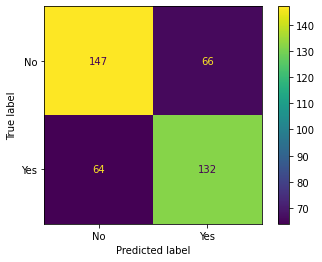

In [30]:
Log_Analisis(classification, X_test, y_test)

<h1> Logistic Regression (Over and Under) <h/1>

In [31]:
TomeSmote = SMOTE()

X_smtl, y_smtl = TomeSmote.fit_sample(X_tl, y_tl)
y_smtl = y_smtl.to_numpy()
y_smtl = pd.DataFrame(data=y_smtl.flatten())
y_smtl.value_counts()

Yes    16521
No     16521
dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_smtl, y_smtl, test_size=0.2, random_state=58)
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())

The accuracy of the model: 0.82 
The Kappa of the model is: 0.65

              precision    recall  f1-score   support

         Yes       0.82      0.84      0.83      3314
          No       0.83      0.81      0.82      3295

    accuracy                           0.82      6609
   macro avg       0.82      0.82      0.82      6609
weighted avg       0.82      0.82      0.82      6609



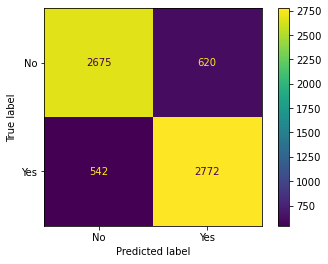

In [33]:
Log_Analisis(classification, X_test, y_test)

<h1> Nearest Neighbour Classifier <h/1>

<h1> Random Forest <h/1>

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=56)
clf = RandomForestClassifier(random_state=56).fit(X_train, y_train.values.ravel())

The accuracy of the model: 0.91 
The Kappa of the model is: 0.82

              precision    recall  f1-score   support

         Yes       0.89      0.94      0.91      3382
          No       0.93      0.89      0.91      3400

    accuracy                           0.91      6782
   macro avg       0.91      0.91      0.91      6782
weighted avg       0.91      0.91      0.91      6782



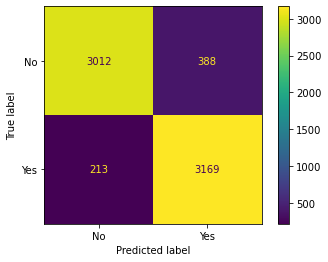

In [36]:
Log_Analisis(clf, X_test, y_test)

<h1> Result Exploration <h/1>

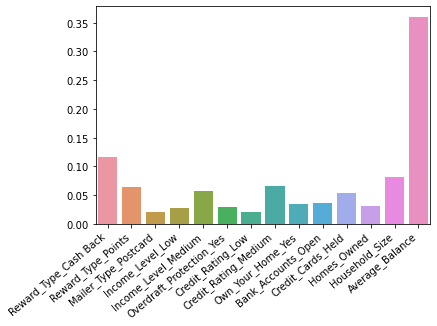

<Figure size 576x288 with 0 Axes>

In [37]:
ax = sns.barplot(x = X.columns, y = clf.feature_importances_) #Barplot to show how much each feature affects the model

plt.figure(figsize=(8,4)) #Make the figure big

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #Have rotated labels for eligibility
plt.tight_layout()
plt.show()

# Bining

In [39]:
def avg_bal_bins(x):
    if x < 520:
        return "Low"
    elif x < 875:
        return "Lower-Mid"
    elif x < 1600:
        return "Higher-Mid"
    else:
        return "High"

In [40]:
df_num2 = df_num
Avg_Bal_Bins = pd.get_dummies(df_num2["Average_Balance"].apply(avg_bal_bins))
df_num2 = df_num2.drop("Average_Balance", axis = 1)

In [41]:
X_bin = pd.concat([df_cat_dum, Avg_Bal_Bins, df_num2], axis = 1)
y_bin = y

X_bin, y_bin = smote.fit_sample(X_bin, y_bin)
y_bin = y_bin.to_numpy()
y_bin = pd.DataFrame(data=y_bin.flatten())
y_bin.value_counts()

Yes    16955
No     16955
dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=56)
clf_bin = RandomForestClassifier(random_state=0).fit(X_train, y_train.values.ravel())

The accuracy of the model: 0.89 
The Kappa of the model is: 0.78

              precision    recall  f1-score   support

         Yes       0.85      0.95      0.89      3382
          No       0.94      0.83      0.88      3400

    accuracy                           0.89      6782
   macro avg       0.89      0.89      0.89      6782
weighted avg       0.89      0.89      0.89      6782



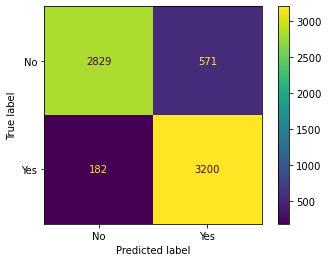

In [43]:
Log_Analisis(clf_bin, X_test, y_test)

# Adding Transformations Removing outliers

In [67]:
print(X.shape)
print(y.shape)

Q1 = X["Average_Balance"].quantile(0.25)
Q3 = X["Average_Balance"].quantile(0.75)
upper = Q3+1.5*(Q3-Q1)
lower = Q1-1.5*(Q3-Q1)

X_filt =  X.loc[(X["Average_Balance"] < upper) & (X["Average_Balance"] > lower)]
y_filt =  y.loc[(X["Average_Balance"] < upper) & (X["Average_Balance"] > lower)]
print(X_filt.shape)
print(y_filt.shape)

(17976, 14)
(17976,)
(16535, 14)
(16535,)


In [63]:
smote_filt = SMOTE()

X_filt, y_filt = smote_filt.fit_sample(X, y)
y_filt = y_filt.to_numpy()
y_filt = pd.DataFrame(data=y_filt.flatten())
y_filt.value_counts()

Yes    16955
No     16955
dtype: int64

The accuracy of the model: 0.91 
The Kappa of the model is: 0.82

              precision    recall  f1-score   support

         Yes       0.89      0.93      0.91      3382
          No       0.93      0.89      0.91      3400

    accuracy                           0.91      6782
   macro avg       0.91      0.91      0.91      6782
weighted avg       0.91      0.91      0.91      6782



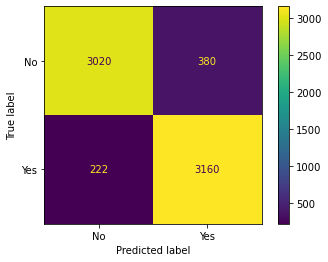

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_filt, y_filt, test_size=0.2, random_state=56)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train.values.ravel())
Log_Analisis(clf, X_test, y_test)

<h1> Transforming the data <h/1>

In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler

transformer = Normalizer().fit(X_sm)
X_norm = transformer.transform(X_sm)

transformer = StandardScaler().fit(X_sm)
X_scal = transformer.transform(X_sm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_sm, test_size=0.2, random_state=56)
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())
Log_Analisis(classification, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y_sm, test_size=0.2, random_state=56)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train.values.ravel())
Log_Analisis(clf, X_test, y_test)

<h1> Dropping Columns (cause why not) <h/1>

In [ ]:
X_drop = X_sm.drop(["Mailer_Type_Postcard"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_drop, y_sm, test_size=0.2, random_state=56)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train.values.ravel())
Log_Analisis(clf, X_test, y_test)

In [ ]:
ax = sns.barplot(x = X_drop.columns, y = clf.feature_importances_) #Barplot to show how much each feature affects the model

plt.figure(figsize=(8,4)) #Make the figure big

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #Have rotated labels for eligibility
plt.tight_layout()
plt.show()